### Preprocessing the data

This notebook shows how the data is preprocessed. Original images are numpy array with two componentes: energy of the particle and noise, both have 50x50 pixels shape. The first step will be to create a new folder to store the cropped images, which will be called 'cropped_images'. Energy images will be cropped but not the noise images. As all the images have to be the same size, we will determine the size of the maximum window (which will correspond to the largest track). Once we obtain the maximum window, we will pad all energy images and crop all noise images to this size.

In [1]:
import os, shutil
import matplotlib.pyplot as plt
import numpy as np
import glob

In [2]:
# The path to the directory where the original dataset was uncompressed
original_dataset_dir = '/gpfs/projects/damic/CCDimg/'

In [3]:
# The directory where we will store our dataset with the cropped images
base_dir = '/gpfs/projects/damic/cropped_images'
os.mkdir(base_dir)

In [ ]:
#destination directory 
dest = '/gpfs/projects/damic/cropped_images'

#initializing size of the maximum window
#window_x: horizontal dimension, window_y: vertical dimension
window_x, window_y = 0, 0

#list of the files in the original dataset
files = os.listdir(original_dataset_dir)

#'index' is the number of the file, and 'file' is the name of the file
for index, file in enumerate(files):  
    
    #loading each image as a numpy array
    energy_a = np.load(os.path.join(original_dataset_dir, files[index]))['energy']
    noise_a = np.load(os.path.join(original_dataset_dir, files[index]))['noise']
    
    #cropping energy images 
    coords = np.argwhere(energy_a) #coordinates of non zero elements in the array
    y_min, x_min = coords.min(axis=0) #coordinates of the element located more on the left and more on the top
    y_max, x_max = coords.max(axis=0) #coordinates of the element located more on the right and more on the bottom
    energy_b = energy_a[y_min:y_max+1, x_min:x_max+1]
    
    #definig the shape of the maximum window
    #we need to add 1 because python starts with row and column 0
    if (x_max-x_min+1) > window_x:
        window_x = x_max-x_min+1
    if (y_max-y_min+1) > window_y:
        window_y = y_max-y_min+1
    
    #copying to the 'cropped_images' directory
    np.savez(os.path.join(dest, file), energy=energy_b, noise=noise_a)
    print(index)

In [5]:
print("The window will have size",window_x,"x",window_y)

The window will have size 147 x 201


In [3]:
#once all the figures are cropped, all of them must have the same size which will correspond to the 
#maxium window shape calculated before

window_x, window_y = 147, 201

#this function will be only applied to the energy of the particle, not the noise
def padding_energy(array):
    
    y, x = window_y, window_x  #y,x is the size of the maximum window
    y_image = array.shape[0]
    x_image = array.shape[1]
    
    if y-y_image == 0:
        reshaped = np.pad(array, ((y-y_image, 0), (x-x_image, 0)),  constant_values=0)
    elif x-x_image == 0:
        reshaped = np.pad(array, ((y-y_image, 0), (x-x_image, 0)),  constant_values=0)
    else:
        #generating random numbers to pad the energy image
        random1 = np.random.randint(0, y-y_image)
        random2 = np.random.randint(0, x-x_image)
    
        #padding
        reshaped = np.pad(array, ((random1, y-y_image-random1), (random2, x-x_image-random2)),  constant_values=0)
    return reshaped

#this function will be applied to the noise of the signal to crop the image
def cropping_noise(array):
    
    y, x = window_y, window_x
    reshaped = array[0:window_y, 0:window_x]
    return reshaped

In [6]:
dest = '/gpfs/projects/damic/cropped_images'

In [ ]:
#reshaping both energy and noise images, so they can be the same size

#list of the files in the original dataset
files = os.listdir(dest)
print(len(files))
#'index' is the number of the file, and 'file' is the name of the file
for index, file in enumerate(files):  
    
    #loading each image as a numpy array
    energy_a = np.load(os.path.join(dest, files[index]))['energy'] 
    noise_a = np.load(os.path.join(dest, files[index]))['noise']
    
    #padding energy images
    energy_a = padding_energy(energy_a)
    
    #cropping noise images
    noise_a = cropping_noise(noise_a)
    
    #copying to the 'cropped_images' directory
    np.savez(os.path.join(dest, file), energy=energy_a, noise=noise_a)
    print(index)

This is an example of the process on an image:

* First, we display the original picture

Text(0.5, 1.0, 'Electron energy')

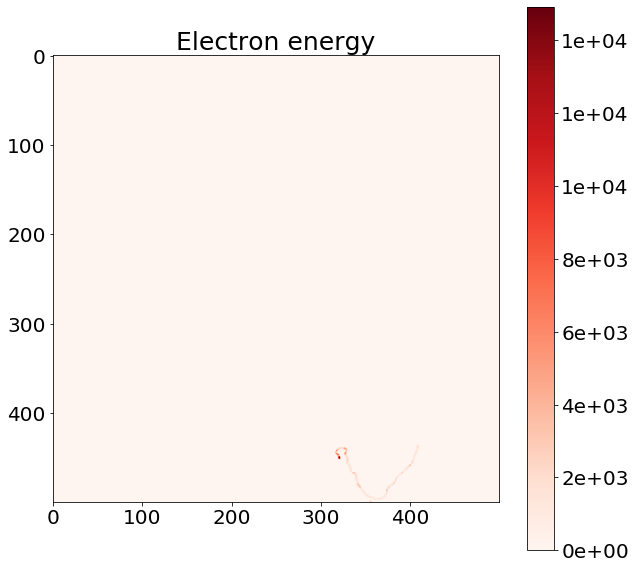

In [8]:
files_original = os.listdir(original_dataset_dir)
e = np.load(os.path.join(original_dataset_dir, files_original[1000]))['energy']
n = np.load(os.path.join(original_dataset_dir, files_original[1000]))['noise']

fig_e = plt.figure(figsize=(10,10))
plt.imshow(e, cmap='Reds')
plt.xticks(fontsize=20, rotation=0)
plt.yticks(fontsize=20)
cb = plt.colorbar(format='%.0e')
cb.ax.tick_params(labelsize=20)
plt.title("Electron energy", fontsize = 25)

In [8]:
myPath = '/gpfs/users/lopezs/data/showing_data'
fig_e.savefig(myPath + '/plot_energy_electron.png')

Text(0.5, 1.0, 'Noise in the electron signal')

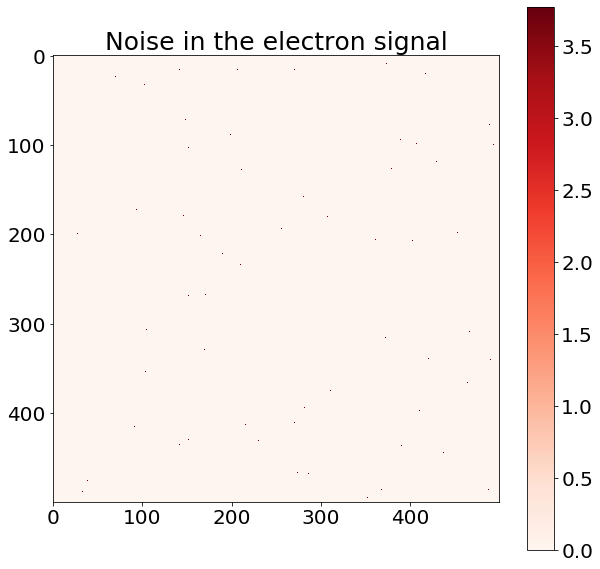

In [9]:
fig_n = plt.figure(figsize=(10,10))
plt.imshow(n, cmap='Reds')
plt.xticks(fontsize=20, rotation=0)
plt.yticks(fontsize=20)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=20)
plt.title("Noise in the electron signal", fontsize=25)

In [13]:
fig_n.savefig(myPath + '/plot_noise_electron.png')

* Then we crop the energy images:

Text(0.5, 1.0, 'Electron energy')

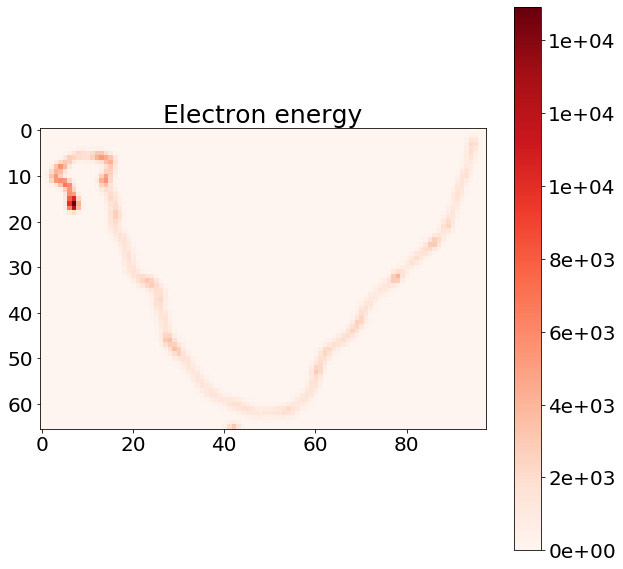

In [10]:
coords = np.argwhere(e)
y_min, x_min = coords.min(axis=0)
y_max, x_max = coords.max(axis=0)
e_b = e[y_min:y_max+1, x_min:x_max+1]

fig_e_b = plt.figure(figsize=(10,10))
plt.imshow(e_b, cmap='Reds')
plt.xticks(fontsize=20, rotation=0)
plt.yticks(fontsize=20)
cb = plt.colorbar(format='%.0e')
cb.ax.tick_params(labelsize=20)
plt.title("Electron energy", fontsize=25)

In [15]:
fig_e_b.savefig(myPath + '/plot_energy_electron_cropped.png')

* Finally, we reshape both energy and noise images so all images have the same shape

Text(0.5, 1.0, 'Electron energy')

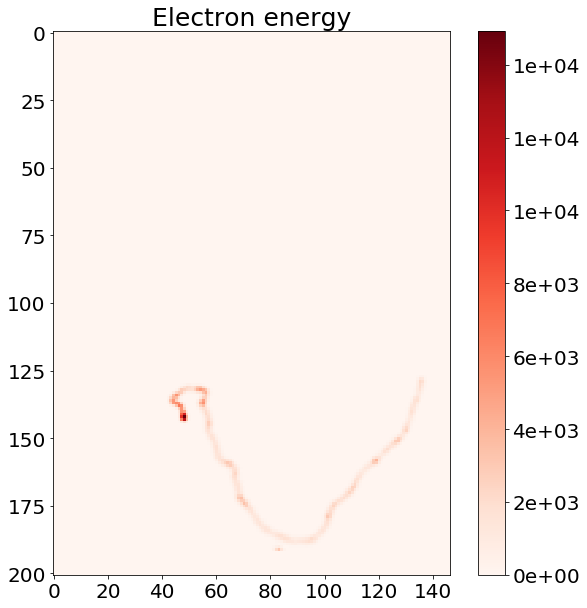

In [11]:
e_shaped = padding_energy(e_b)
n_shaped = cropping_noise(n)

fig_e_s = plt.figure(figsize=(10,10))
plt.imshow(e_shaped, cmap='Reds')
plt.xticks(fontsize=20, rotation=0)
plt.yticks(fontsize=20)
cb = plt.colorbar(format='%.0e')
cb.ax.tick_params(labelsize=20)
plt.title("Electron energy", fontsize=25)

In [13]:
myPath = '/gpfs/users/lopezs/data/showing_data'
fig_e_s.savefig(myPath + '/plot_energy_electron_final.png')

Text(0.5, 1.0, 'Noise in the electron signal')

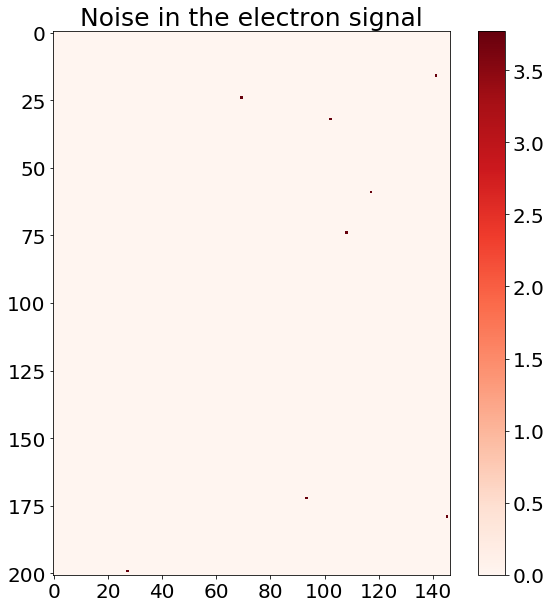

In [34]:
fig_n_s = plt.figure(figsize=(10,10))
plt.imshow(n_shaped, cmap='Reds')
plt.xticks(fontsize=20, rotation=0)
plt.yticks(fontsize=20)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=20)
plt.title("Noise in the electron signal", fontsize=25)

In [24]:
fig_n_s.savefig(myPath + '/plot_noise_final.png')